In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import tensorflow as tf
import os
import glob
import cv2 
import nltk
import re
import string
import copy
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix, classification_report           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Почнемо з FCNN

In [2]:
df = pd.read_csv("C:/Users/LEGION/anaconda3/wineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df = df.drop(columns=['Id'])

In [4]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [5]:
y = [(round(each / 10)) for each in y]

In [6]:
X =  np.array(X)
y = np.array(y)

In [7]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [8]:
model = Sequential()
model.add(layers.Dense(32, input_dim=11, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, batch_size=50, verbose=2)

Epoch 1/200
23/23 - 0s - loss: 0.7294 - accuracy: 0.4584 - 463ms/epoch - 20ms/step
Epoch 2/200
23/23 - 0s - loss: 0.6614 - accuracy: 0.6010 - 23ms/epoch - 997us/step
Epoch 3/200
23/23 - 0s - loss: 0.6155 - accuracy: 0.6842 - 26ms/epoch - 1ms/step
Epoch 4/200
23/23 - 0s - loss: 0.5762 - accuracy: 0.7270 - 28ms/epoch - 1ms/step
Epoch 5/200
23/23 - 0s - loss: 0.5462 - accuracy: 0.7332 - 25ms/epoch - 1ms/step
Epoch 6/200
23/23 - 0s - loss: 0.5262 - accuracy: 0.7445 - 23ms/epoch - 996us/step
Epoch 7/200
23/23 - 0s - loss: 0.5145 - accuracy: 0.7542 - 25ms/epoch - 1ms/step
Epoch 8/200
23/23 - 0s - loss: 0.5060 - accuracy: 0.7533 - 24ms/epoch - 1ms/step
Epoch 9/200
23/23 - 0s - loss: 0.4996 - accuracy: 0.7612 - 26ms/epoch - 1ms/step
Epoch 10/200
23/23 - 0s - loss: 0.4937 - accuracy: 0.7725 - 22ms/epoch - 952us/step
Epoch 11/200
23/23 - 0s - loss: 0.4906 - accuracy: 0.7708 - 31ms/epoch - 1ms/step
Epoch 12/200
23/23 - 0s - loss: 0.4864 - accuracy: 0.7760 - 29ms/epoch - 1ms/step
Epoch 13/200
23/2

Epoch 100/200
23/23 - 0s - loss: 0.3281 - accuracy: 0.8661 - 18ms/epoch - 781us/step
Epoch 101/200
23/23 - 0s - loss: 0.3228 - accuracy: 0.8714 - 20ms/epoch - 866us/step
Epoch 102/200
23/23 - 0s - loss: 0.3205 - accuracy: 0.8679 - 20ms/epoch - 866us/step
Epoch 103/200
23/23 - 0s - loss: 0.3158 - accuracy: 0.8775 - 25ms/epoch - 1ms/step
Epoch 104/200
23/23 - 0s - loss: 0.3185 - accuracy: 0.8653 - 25ms/epoch - 1ms/step
Epoch 105/200
23/23 - 0s - loss: 0.3161 - accuracy: 0.8679 - 21ms/epoch - 910us/step
Epoch 106/200
23/23 - 0s - loss: 0.3138 - accuracy: 0.8731 - 20ms/epoch - 867us/step
Epoch 107/200
23/23 - 0s - loss: 0.3123 - accuracy: 0.8705 - 19ms/epoch - 824us/step
Epoch 108/200
23/23 - 0s - loss: 0.3091 - accuracy: 0.8714 - 19ms/epoch - 824us/step
Epoch 109/200
23/23 - 0s - loss: 0.3089 - accuracy: 0.8766 - 19ms/epoch - 824us/step
Epoch 110/200
23/23 - 0s - loss: 0.3074 - accuracy: 0.8723 - 20ms/epoch - 867us/step
Epoch 111/200
23/23 - 0s - loss: 0.3026 - accuracy: 0.8775 - 21ms/epo

Epoch 197/200
23/23 - 0s - loss: 0.1815 - accuracy: 0.9388 - 19ms/epoch - 824us/step
Epoch 198/200
23/23 - 0s - loss: 0.1810 - accuracy: 0.9344 - 22ms/epoch - 938us/step
Epoch 199/200
23/23 - 0s - loss: 0.1823 - accuracy: 0.9396 - 20ms/epoch - 864us/step
Epoch 200/200
23/23 - 0s - loss: 0.1794 - accuracy: 0.9370 - 21ms/epoch - 911us/step


In [10]:
model.evaluate(X, y)

36/36 [==============================] - 0s 798us/step - loss: 0.1716 - accuracy: 0.9449


[0.17164912819862366, 0.9448819160461426]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


CNN Model in action

In [12]:
path = 'C:/Users/LEGION/anaconda3/chess'
traindf=tf.keras.preprocessing.image_dataset_from_directory(path, validation_split=0.2, image_size=(224,224), batch_size=32, subset="training", seed=123)


Found 651 files belonging to 5 classes.
Using 521 files for training.


In [13]:
testdf=tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2, image_size=(224,224), batch_size=32, subset="validation", seed=123)

Found 651 files belonging to 5 classes.
Using 130 files for validation.


In [14]:
class_names = ['queen','rook','bishop','knight','pawn']

In [15]:
in_put = keras.Input(shape = (224,224,3))
preprocess = keras.applications.mobilenet.preprocess_input(in_put)
upscale = layers.Lambda(lambda x : tf.image.resize_with_pad(x,224,224, method = tf.image.ResizeMethod.BILINEAR))(in_put)

In [16]:
mnet = MobileNet(include_top='True', weights='imagenet', input_tensor = (upscale),
                       input_shape = (224, 224, 3))

In [17]:
augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

In [18]:
cnn_model = Sequential()
cnn_model.add(preprocessing.Rescaling(1./255 ,input_shape=(224,224,3)))
cnn_model.add(augmentation)
cnn_model.add(mnet)
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128 , activation = 'relu'))
cnn_model.add(layers.Dense(len(class_names) , activation = 'softmax'))
cnn_model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam' , metrics=['accuracy'])

Epoch 1/20
17/17 [==============================] - 39s 2s/step - loss: 0.9522 - accuracy: 0.6583 - val_loss: 1.0325 - val_accuracy: 0.6308
Epoch 2/20
17/17 [==============================] - 41s 2s/step - loss: 0.7932 - accuracy: 0.7198 - val_loss: 0.7833 - val_accuracy: 0.7154
Epoch 3/20
17/17 [==============================] - 43s 3s/step - loss: 0.7538 - accuracy: 0.7409 - val_loss: 0.8164 - val_accuracy: 0.7000
Epoch 4/20
17/17 [==============================] - 39s 2s/step - loss: 0.7320 - accuracy: 0.7198 - val_loss: 0.7984 - val_accuracy: 0.7231
Epoch 5/20
17/17 [==============================] - 39s 2s/step - loss: 0.6941 - accuracy: 0.7543 - val_loss: 1.1183 - val_accuracy: 0.6154
Epoch 6/20
17/17 [==============================] - 39s 2s/step - loss: 0.6506 - accuracy: 0.7582 - val_loss: 0.9523 - val_accuracy: 0.6462
Epoch 7/20
17/17 [==============================] - 40s 2s/step - loss: 0.7217 - accuracy: 0.7332 - val_loss: 1.2715 - val_accuracy: 0.5692
Epoch 8/20
17/17 [==

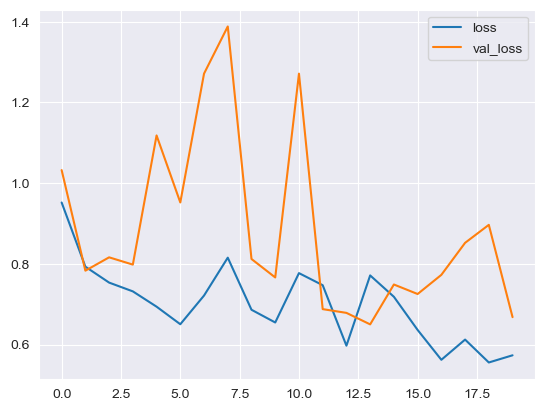

In [19]:
hist = cnn_model.fit(traindf,validation_data= testdf, epochs=20)
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

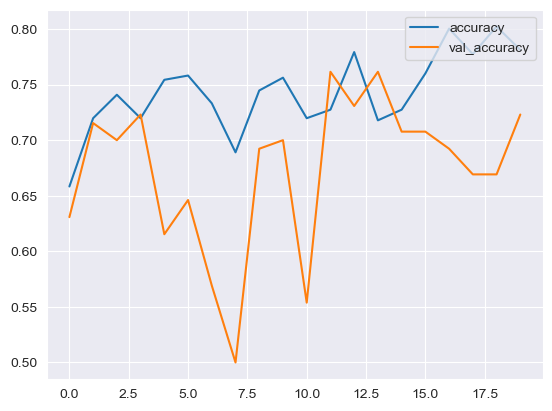

In [20]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

RNN Model in action

In [21]:
tweets = pd.read_csv("C:/Users/LEGION/anaconda3/tweets.csv")
tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [22]:
tweets.rename(columns = {'Tweet':'text'}, inplace = True)
tweets.rename(columns = {'Stock Name':'stock'}, inplace = True)

In [23]:
tweets1 = tweets[tweets['stock'] == 'AAPL']
tweets2 = tweets[tweets['stock'] == 'MSFT']
tweets = pd.concat([tweets1, tweets2])
print(tweets.shape)
tweets.head()

(9145, 4)


,Date,text,stock,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.


In [24]:
tweets = tweets.iloc[:,1:-1]

In [25]:
dataf = tweets.replace({'AAPL':0,'MSFT':1})
dataf

,text,stock
55958,$NIO just because I'm down money doesn't mean ...,0
55959,After trading for 9+ years \n\nThis is how to ...,0
55960,Not something you see very often. \n-2 ATR mo...,0
55961,$AAPL was down almost 5% today. Rare to see it...,0
55962,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,0
...,...,...
41506,My top 10 holdings make up 66% of my portfolio...,1
41507,Amazon $AMZN has 4X the market cap of Alibaba ...,1
41508,Returns over the last 10 Years:\n\nBitcoin $BT...,1
41509,Great snapshot of what it looks like when an i...,1


In [26]:
datafr = pd.concat([dataf['stock'], dataf['text'].str.lower()], axis=1)
lower=pd.DataFrame(datafr)
display(lower)

,stock,text
55958,0,$nio just because i'm down money doesn't mean ...
55959,0,after trading for 9+ years \n\nthis is how to ...
55960,0,not something you see very often. \n-2 atr mo...
55961,0,$aapl was down almost 5% today. rare to see it...
55962,0,$aapl apple just fired its head of procurement...
...,...,...
41506,1,my top 10 holdings make up 66% of my portfolio...
41507,1,amazon $amzn has 4x the market cap of alibaba ...
41508,1,returns over the last 10 years:\n\nbitcoin $bt...
41509,1,great snapshot of what it looks like when an i...


In [27]:
def remove_stopwords(text, stoplist):
    return [word for word in text if word not in stoplist]

def remove_punctuation(text):
    punctuation = string.punctuation
    return ''.join([c if c not in punctuation else ' ' for c in text])

def remove_spaces(text):
    return re.sub(r'\s+', ' ', text)

cleaned_text = [remove_punctuation(remove_spaces(str(text).lower())) for text in lower['text']]
lower['text'] = cleaned_text
lower

,stock,text
55958,0,nio just because i m down money doesn t mean ...
55959,0,after trading for 9 years this is how to find...
55960,0,not something you see very often 2 atr move ...
55961,0,aapl was down almost 5 today rare to see it...
55962,0,aapl apple just fired its head of procurement...
...,...,...
41506,1,my top 10 holdings make up 66 of my portfolio...
41507,1,amazon amzn has 4x the market cap of alibaba ...
41508,1,returns over the last 10 years bitcoin btc ...
41509,1,great snapshot of what it looks like when an i...


In [28]:
lower.index = range(9145)
lower

,stock,text
0,0,nio just because i m down money doesn t mean ...
1,0,after trading for 9 years this is how to find...
2,0,not something you see very often 2 atr move ...
3,0,aapl was down almost 5 today rare to see it...
4,0,aapl apple just fired its head of procurement...
...,...,...
9140,1,my top 10 holdings make up 66 of my portfolio...
9141,1,amazon amzn has 4x the market cap of alibaba ...
9142,1,returns over the last 10 years bitcoin btc ...
9143,1,great snapshot of what it looks like when an i...


In [29]:
y = lower.iloc[:,0:-1]
X = lower.iloc[:,-1]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state = 42)

In [31]:
rnn_model = Sequential()
rnn_model.add(layers.Embedding(2, 32))
rnn_model.add(layers.SimpleRNN(16))
rnn_model.add(layers.Dense(2, activation='softmax'))

rnn_model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
27/27 [==============================] - 2s 50ms/step - loss: 0.9236 - accuracy: 0.8271 - val_loss: 0.3405 - val_accuracy: 0.8315
Epoch 2/10
27/27 [==============================] - 2s 50ms/step - loss: 0.3798 - accuracy: 0.9182 - val_loss: 0.4793 - val_accuracy: 0.9259
Epoch 3/10
27/27 [==============================] - 1s 48ms/step - loss: 0.0562 - accuracy: 0.9751 - val_loss: 0.0745 - val_accuracy: 0.9733
Epoch 4/10
27/27 [==============================] - 1s 44ms/step - loss: 0.0221 - accuracy: 0.9853 - val_loss: 0.0424 - val_accuracy: 0.9797
Epoch 5/10
27/27 [==============================] - 1s 46ms/step - loss: 0.0119 - accuracy: 0.9887 - val_loss: 0.0342 - val_accuracy: 0.9874
Epoch 6/10
27/27 [==============================] - 1s 46ms/step - loss: 0.0086 - accuracy: 0.9894 - val_loss: 0.0573 - val_accuracy: 0.9825
Epoch 7/10
27/27 [==============================] - 1s 48ms/step - loss: 0.0092 - accuracy: 0.9876 - val_loss: 0.0574 - val_accuracy: 0.9795
Epoch 8/10
27